### Estrazione dei prezzi di un prodotto da ebay, per avere un idea del prezzo di mercato
Ipotizziamo di voler acquistare una scheda grafica, ma non sappiamo quale sia il prezzo di mercato. Varia molto in base al venditore, e non possiamo controllare tutti i venditori. Quindi, possiamo usare questo script per estrarre i prezzi di un prodotto da ebay, e avere un idea del prezzo di mercato.

In [6]:
from bs4 import BeautifulSoup
import requests

url = "https://www.ebay.it/sch/i.html?_from=R40&_nkw=4080&_sacat=0&_odkw=3080&_osacat=0"

In [19]:
def fetch_ebay_listings(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    response = requests.get(url, headers=headers)
    
    # Ensure the request was successful
    if response.status_code != 200:
        print("Failed to retrieve the page")
        return
    
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all listings on the page
    products = soup.find_all('div', class_='s-item__info clearfix')

    results = []
    for product in products:
        title = product.find('div', class_='s-item__title')
        subtitle = product.find('div', class_='s-item__subtitle')
        price = product.find('span', class_='s-item__price')
        
        results.append({
            'title': title.text,
            'subtitle': subtitle.text,
            'price': price.text
        })
    
    return results

# Example URL (ensure to replace with a valid one or parameterize appropriately)
url = "https://www.ebay.it/sch/i.html?_from=R40&_nkw=4080&_sacat=0&_odkw=3080&_osacat=0"
listings = fetch_ebay_listings(url)
# print(listings)

In [27]:
print(listings[0])
print(listings[20])

{'title': 'Shop on eBay', 'subtitle': 'Brand New', 'price': '$20.00'}
{'title': 'GAINWARD GEFORCE RTX 4080 SUPER PHOENIX, SCHEDA GRAFICA    NUOVO NEGOZIO ROMA', 'subtitle': 'Nuovo | Venditore privato', 'price': 'EUR 1.129,00'}


Eseguiamo ualche step di preprocessing per ottenere i dati in un formato più pulito e leggibile.
Inoltre cambiamo l'URL aggiungendo dei parametri per stringere la ricerca, per esempio provenienza dall'Italia, condizione specifica del prodotto.
Su Ebay si può guardare il prezzo dei prodotti venduti, che indica in modo più preciso il prezzo di mercato.

In [54]:
def fetch_ebay_listings(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    response = requests.get(url, headers=headers)
    
    # Ensure the request was successful
    if response.status_code != 200:
        print("Failed to retrieve the page")
        return
    
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all listings on the page
    products = soup.find_all('div', class_='s-item__info clearfix')

    results = []
    for i, product in enumerate(products):
        if i == 0:  # Skip the first product
            continue
        title = product.find('div', class_='s-item__title')
        subtitle = product.find('div', class_='s-item__subtitle')
        price = product.find('span', class_='s-item__price')
        n_bids = product.find('span', class_='s-item__bids s-item__bidCount')

        # Dividi il testo di subtitle sul simbolo '|'
        parts = subtitle.text.split('|')
        if len(parts) == 2:  # Assicurati che ci siano esattamente due parti
            item_condition, seller_type = [part.strip() for part in parts]
            # Rimuovi "EUR " e sostituisci la virgola con un punto, poi converti in float
            price_in_euro = float(price.text.replace('EUR ', '').replace('.', '').replace(',', '.'))
        
        # estraiamo il numero dall'elemento n_bids
        n_bids = int(n_bids.text.split(' ')[0])

        # Aggiungi i dati al risultato
        results.append({
            'title': title.text.strip(),
            'seller_type': seller_type,
            'item_condition': item_condition,
            'price': price_in_euro,
            'n_bids': n_bids
        })
        if i == 10:  # Limita il numero di risultati a 10
            break
    
    return results

# Example URL (ensure to replace with a valid one or parameterize appropriately)
url = "https://www.ebay.it/sch/i.html?_from=R40&_nkw=4080&_sacat=0&LH_Sold=1&LH_Auction=1&LH_PrefLoc=1&rt=nc"
listings = fetch_ebay_listings(url)
listings = listings[1:-1]

In [55]:
print(listings[0])

{'title': 'KFA2 GeForce RTX 4080 SG 16GB GDDR6X Scheda Grafica', 'seller_type': 'Venditore privato', 'item_condition': 'Di seconda mano', 'price': 805.0, 'n_bids': 5}


In [56]:
# now let's make a dataframe
import pandas as pd
df = pd.DataFrame(listings)

In [57]:
df

,title,seller_type,item_condition,price,n_bids
0,KFA2 GeForce RTX 4080 SG 16GB GDDR6X Scheda Gr...,Venditore privato,Di seconda mano,805.0,5
1,Scheda video ZOTAC Nvidia RTX 4080 Trinity OC ...,Venditore professionale,Solo ricambi,605.0,31
2,ASUS ROG Strix GeForce RTX 4080 OC 16GB GDDR6X...,Venditore professionale,Di seconda mano,1270.0,49
3,KFA2 GeForce RTX 4080 SG 16GB GDDR6X Scheda Gr...,Venditore privato,Di seconda mano,1012.6,3
4,Inno3D GeForce RTX 4080 X3 NVIDIA 16 GB GDDR6X,Venditore privato,Di seconda mano,905.0,28
5,Nvidia GeForce RTX 3080 Ti ZOTAC GAMING Trinit...,Venditore privato,Di seconda mano,569.0,1
6,GIGABYTE GeForce RTX 4080 EAGLE OC 16GB GDDR6X...,Venditore privato,Di seconda mano,895.0,36
7,NVIDIA GeForce RTX 4080 SUPER FE Founders Edit...,Venditore privato,Nuovo,1420.0,63


In [66]:
# calcoliamo il prezzo medio, minimo e massimo
mean_price = df['price'].mean()
min_price = df['price'].min()
max_price = df['price'].max()
print(f"Mean price: {mean_price}, Min price: {min_price}, Max price: {max_price}")

Mean price: 935.2, Min price: 569.0, Max price: 1420.0


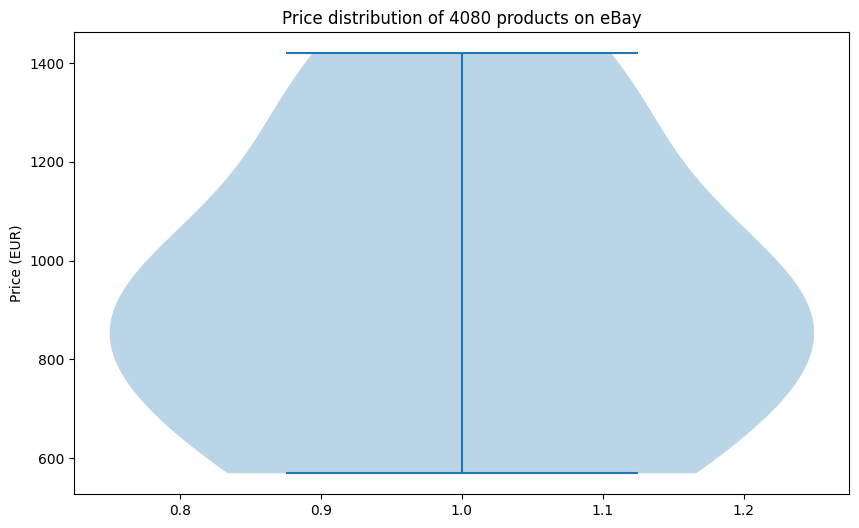

In [60]:
# ora facciamo un plot dei prezzi sui prodotti
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6))
plt.violinplot(df['price'])
plt.ylabel('Price (EUR)')
plt.title('Price distribution of 4080 products on eBay')
plt.show()